# CHƯƠNG TRÌNH TRẢ LỜI CÁC BÀI TOÁN THỰC TẾ CỦA MỘT DOANH NGHIỆP:
- Tháng nào có doanh số tốt nhất? Doanh số tháng đó là bao nhiêu?
- Thành phố nào có doanh số cao nhất?
- Doanh nghiệp cần chiếu quảng cáo vào khung thời gian nào để tăng khả năng mua hàng của khách hàng?
- Những sản phẩm nào thường được bán cùng nhau?
- Sản phẩm nào được bán nhiều nhất? Giả thiết của bạn về lý do sản phẩm này được bán nhiều nhất là gì?

## 1) IMport librarys & Data

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = r"C:\Users\ADMIN\Downloads\Project\Sales Reporting -20240505T073101Z-001\Sales Reporting\\"
path

'C:\\Users\\ADMIN\\Downloads\\Project\\Sales Reporting -20240505T073101Z-001\\Sales Reporting\\\\'

In [3]:
frames = []
all_length = []
for file in os.listdir(path):
    filepath = path + file
    df1 = pd.read_csv(filepath)
    frames.append(df1)
    result = pd.concat(frames)
    length = len(df1)
    all_length.append(length)
df = result
df.to_csv("annualSales2019.csv", index = False)

In [4]:
print(sum(all_length))

186850


In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## 2) EDA & Data Wrangling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
df.duplicated().sum()

1162

In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df=df.dropna(how='all')
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11681    False
11682    False
11683    False
11684    False
11685    False
Length: 186305, dtype: bool

In [12]:
df2 = df.drop_duplicates()

In [13]:
df2.duplicated().sum()

0

In [14]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [15]:
df['Quantity Ordered'].value_counts()

Quantity Ordered
1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: count, dtype: int64

In [16]:
df=df[df['Quantity Ordered'] != "Quantity Ordered"]
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')
df['Quantity Ordered'].dtype

dtype('int32')

In [17]:
df['Order ID'].value_counts()

Order ID
160873    5
178158    4
194253    4
242936    4
212334    4
         ..
310809    1
310810    1
310811    1
310812    1
259357    1
Name: count, Length: 178437, dtype: int64

In [18]:
df['Order ID'] = df['Order ID'].astype('int')

In [19]:
df['Price Each'] = df['Price Each'].astype('float')

In [133]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 8.5+ MB


In [22]:
df['Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [178]:
df['Amount'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Amount,Order Date,Purchase Address,Month,Cities,hour,All Product
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston,21,NaN
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland,14,NaN
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco,13,NaN
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,20,NaN
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin,11,NaN


In [179]:
moving_column = df.pop('Amount')
df.insert(4,'Amount', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Amount,Order Date,Purchase Address,Month,Cities,hour,All Product
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston,21,NaN
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland,14,NaN
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco,13,NaN
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,20,NaN
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin,11,NaN


## 3) Report

### Task 3.1: What was the best month for sales? How much was earned that month?

In [25]:
sales_value = df.groupby('Month')['Amount'].sum()
sales_value

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Amount, dtype: float64

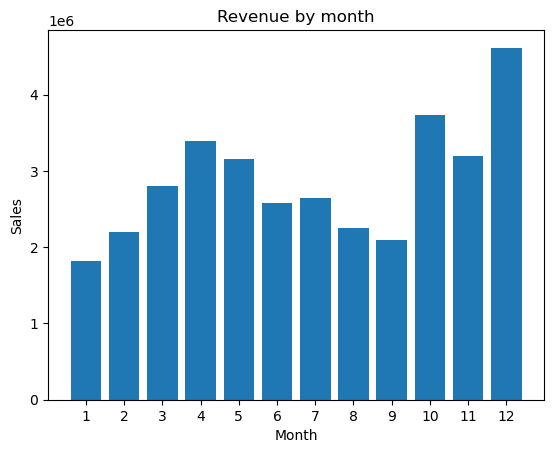

In [27]:
plt.bar(x=df['Month'].sort_values(ascending = True).unique(), height = sales_value)
plt.title('Revenue by month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(df['Month'].sort_values(ascending = True).unique())
plt.show()

In [28]:
df['Month'].sort_values(ascending = False)

17314    12
8357     12
8335     12
8336     12
8337     12
         ..
6503      1
6502      1
6501      1
6500      1
0         1
Name: Month, Length: 185950, dtype: int32

In [29]:
df['Cities'] = df["Purchase Address"].str.split(',').str.get(1)
df

,Order ID,Product,Quantity Ordered,Price Each,Amount,Order Date,Purchase Address,Month,Cities
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
11682,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
11683,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco


### Task 3.2: What city has the best sales?

In [174]:
sales_city = df.groupby('Cities')['Amount'].sum().sort_values(ascending = True)
sales_city

Cities
 Austin           1819581.75
 Portland         2320490.61
 Seattle          2747755.48
 Dallas           2767975.40
 Atlanta          2795498.58
 Boston           3661642.01
 New York City    4664317.43
 Los Angeles      5452570.80
 San Francisco    8262203.91
Name: Amount, dtype: float64

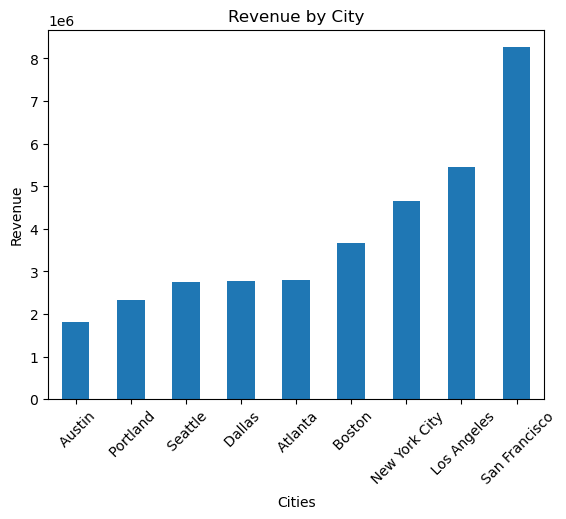

In [175]:
sales_city.plot(kind='bar')
plt.title("Revenue by City")
plt.xlabel('Cities')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.show()

### Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product?

In [45]:
df['hour'] = df['Order Date'].dt.hour

sales_hour = df.groupby('hour')['Order ID'].count()
sales_hour

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

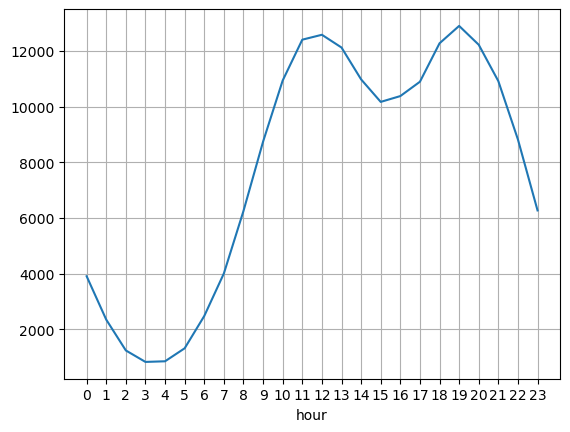

In [53]:
sales_hour.plot(kind='line')
plt.grid()
plt.xticks(df['hour'].sort_values(ascending=True).unique())
plt.show()

### Task 3.4: What products are most often sold together?

In [67]:
df_dup = df[df['Order ID'].duplicated(keep=False)]

In [96]:
df_dup.loc[:,'All Product'] = df_dup.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df_dup = df_dup[['Order ID', 'All Product']].drop_duplicates()
df_dup

,Order ID,All Product
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
11617,259296,Apple Airpods Headphones
11619,259297,"iPhone, Lightning Charging Cable"
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [128]:
from itertools import combinations
from collections import Counter

count = Counter()

for products in df_dup['All Product']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

print(count)

Counter({('iPhone', ' Lightning Charging Cable'): 1002, ('Google Phone', ' USB-C Charging Cable'): 985, ('iPhone', ' Wired Headphones'): 447, ('Google Phone', ' Wired Headphones'): 413, ('Vareebadd Phone', ' USB-C Charging Cable'): 361, ('iPhone', ' Apple Airpods Headphones'): 360, ('Google Phone', ' Bose SoundSport Headphones'): 220, ('Vareebadd Phone', ' Wired Headphones'): 143, (' USB-C Charging Cable', ' Wired Headphones'): 119, ('Vareebadd Phone', ' Bose SoundSport Headphones'): 80, (' Lightning Charging Cable', ' Wired Headphones'): 62, ('Lightning Charging Cable', ' USB-C Charging Cable'): 55, ('Lightning Charging Cable', ' AA Batteries (4-pack)'): 52, ('AA Batteries (4-pack)', ' Lightning Charging Cable'): 51, (' USB-C Charging Cable', ' Bose SoundSport Headphones'): 51, ('AAA Batteries (4-pack)', ' USB-C Charging Cable'): 50, ('AA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 48, (' Lightning Charging Cable', ' Apple Airpods Headphones'): 47, ('Apple Airpods Headphones', ' 

In [101]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1002
('Google Phone', ' USB-C Charging Cable') 985
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 413
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 119
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


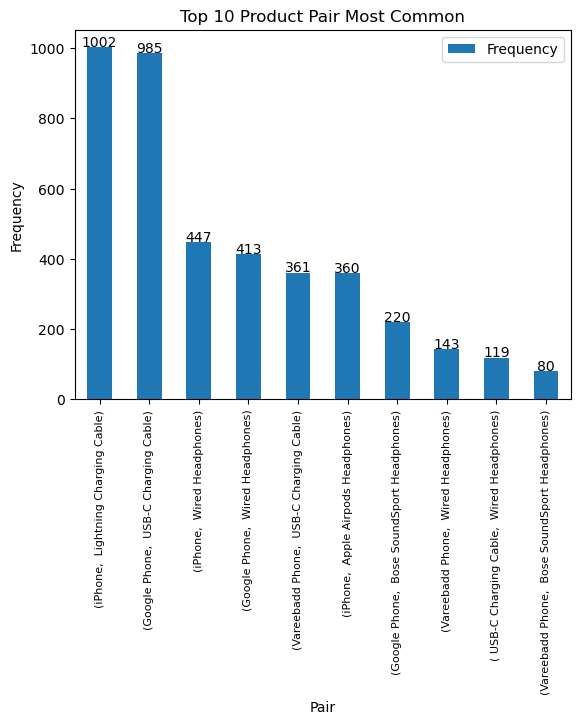

In [132]:
c = pd.DataFrame(count.most_common(10))
c.set_index(0, inplace = True)
c.rename(columns = {1: 'Frequency'}, inplace = True)
c.plot(kind = 'bar')
for i, value in enumerate(c['Frequency']):
    plt.text(i, value + 2, str(value), ha='center')
plt.title('Top 10 Product Pair Most Common')
plt.xlabel('Pair')
plt.ylabel('Frequency')
plt.xticks(rotation = 90, size = 8)
plt.show()

### Task 3.5: What product sold the most? Why do you think it sold the most?

In [163]:
sales_quan = df.groupby('Product')['Quantity Ordered'].sum()
sales_price = df.groupby('Product')['Price Each'].mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19316\95703600.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sales_quan.index, rotation=90, size=8)


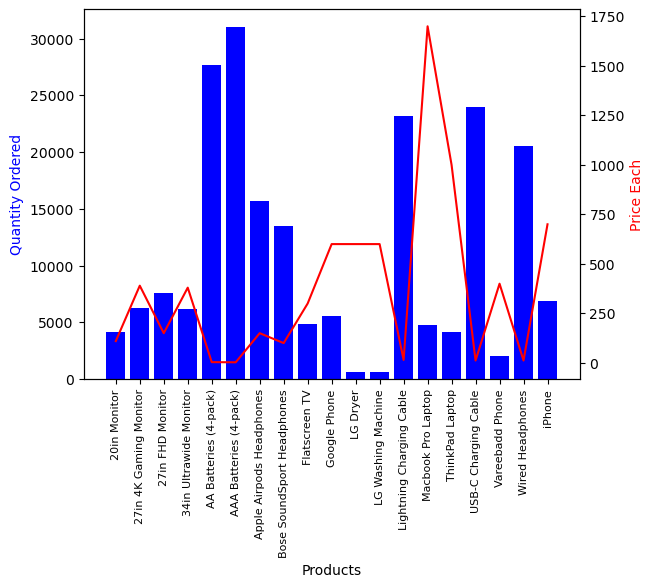

In [173]:
x = sales_quan.index
y1 = sales_quan
y2 = sales_price

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='b')
ax2.plot(x, y2, 'r')

ax1.set_xticklabels(sales_quan.index, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price Each', color='r')

plt.show()